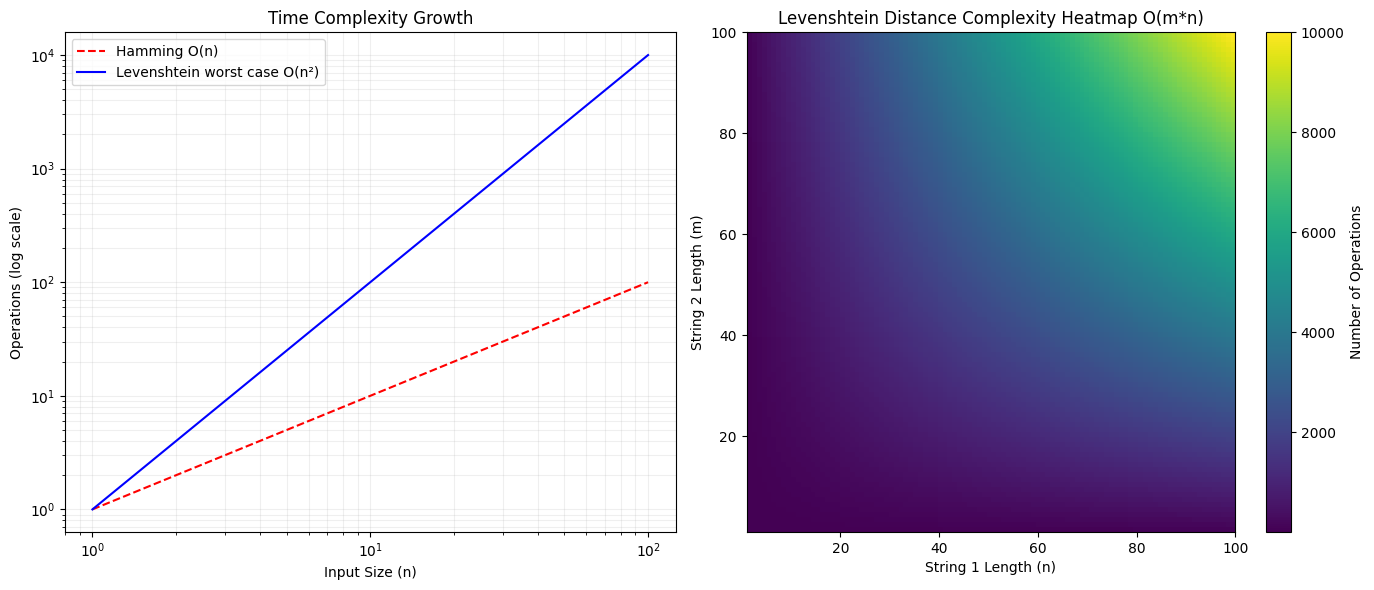

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Generate data
n_values = np.arange(1, 101)
m_values = np.arange(1, 101)
X, Y = np.meshgrid(n_values, m_values)
Z = X * Y  # O(m*n) complexity for Levenshtein

# 3D surface plot for Levenshtein Distance O(m*n)
ax1.plot(n_values, n_values, 'r--', label='Hamming O(n)')
ax1.plot(n_values, n_values**2, 'b-', label='Levenshtein worst case O(n²)')

# Log scale to better see the difference
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('Input Size (n)')
ax1.set_ylabel('Operations (log scale)')
ax1.set_title('Time Complexity Growth')
ax1.legend()
ax1.grid(True, which="both", ls="-", alpha=0.2)

# Heatmap for Levenshtein O(m*n)
levenshtein_map = ax2.imshow(Z, cmap='viridis', aspect='auto',
                            extent=[1, 100, 1, 100], origin='lower')
ax2.set_xlabel('String 1 Length (n)')
ax2.set_ylabel('String 2 Length (m)')
ax2.set_title('Levenshtein Distance Complexity Heatmap O(m*n)')
plt.colorbar(levenshtein_map, ax=ax2, label='Number of Operations')

plt.tight_layout()
plt.show()

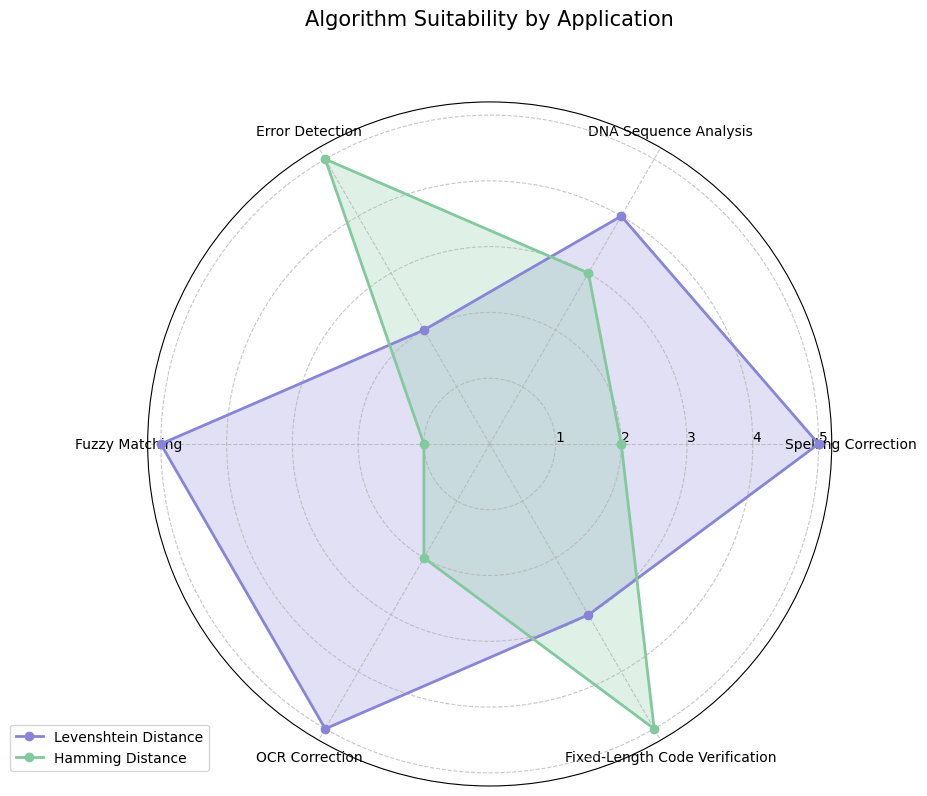

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Categories and scores from 0-5 (higher is better)
categories = [
    'Spelling Correction',
    'DNA Sequence Analysis',
    'Error Detection',
    'Fuzzy Matching',
    'OCR Correction',
    'Fixed-Length Code Verification'
]

# Scores (based on paper analysis)
levenshtein_scores = [5, 4, 2, 5, 5, 3]
hamming_scores = [2, 3, 5, 1, 2, 5]

# Create angles for each category
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Extend scores to close the loop
levenshtein_scores += levenshtein_scores[:1]
hamming_scores += hamming_scores[:1]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Plot data
ax.plot(angles, levenshtein_scores, 'o-', linewidth=2, label='Levenshtein Distance', color='#8884d8')
ax.fill(angles, levenshtein_scores, alpha=0.25, color='#8884d8')
ax.plot(angles, hamming_scores, 'o-', linewidth=2, label='Hamming Distance', color='#82ca9d')
ax.fill(angles, hamming_scores, alpha=0.25, color='#82ca9d')

# Set category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Set radial ticks and remove grid lines
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(['1', '2', '3', '4', '5'])
ax.set_rlabel_position(0)
ax.grid(True, linestyle='--', alpha=0.7)

# Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Algorithm Suitability by Application', size=15, y=1.1)

plt.tight_layout()
plt.show()

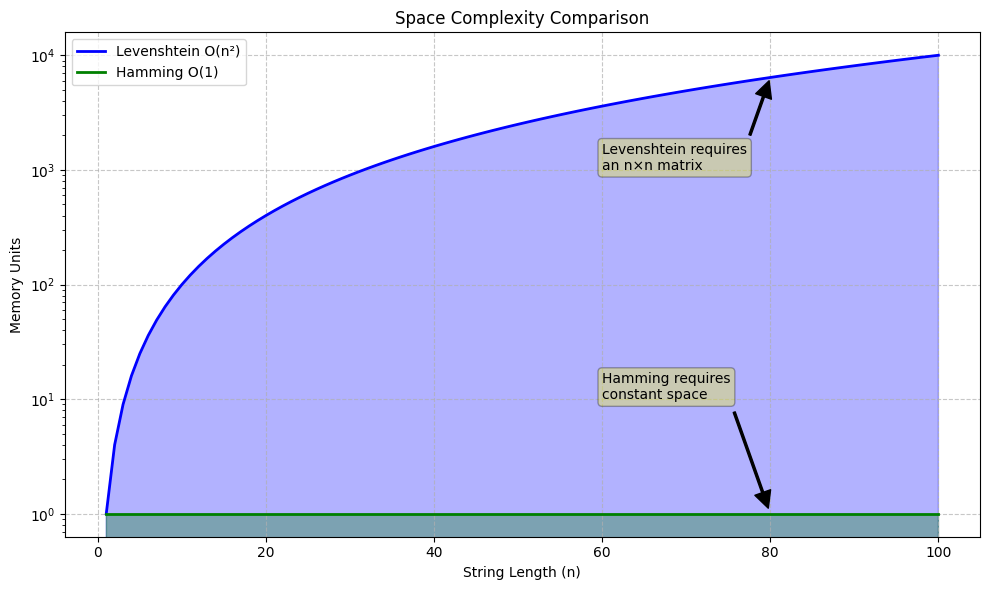

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Create data points
string_lengths = np.arange(1, 101)
levenshtein_space = [n**2 for n in string_lengths]  # O(n²) simplified from O(m*n) when m=n
hamming_space = [1 for _ in string_lengths]  # O(1)

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot space complexity
ax.plot(string_lengths, levenshtein_space, 'b-', linewidth=2, label='Levenshtein O(n²)')
ax.plot(string_lengths, hamming_space, 'g-', linewidth=2, label='Hamming O(1)')

# Fill areas
ax.fill_between(string_lengths, levenshtein_space, alpha=0.3, color='blue')
ax.fill_between(string_lengths, hamming_space, alpha=0.3, color='green')

# Add labels and title
ax.set_xlabel('String Length (n)')
ax.set_ylabel('Memory Units')
ax.set_title('Space Complexity Comparison')
ax.legend()

# Add grid and log scale for y-axis
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_yscale('log')

# Annotate the significant difference
plt.annotate('Levenshtein requires\nan n×n matrix',
             xy=(80, levenshtein_space[79]),
             xytext=(60, 1000),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

plt.annotate('Hamming requires\nconstant space',
             xy=(80, hamming_space[79]),
             xytext=(60, 10),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

plt.tight_layout()
plt.show()

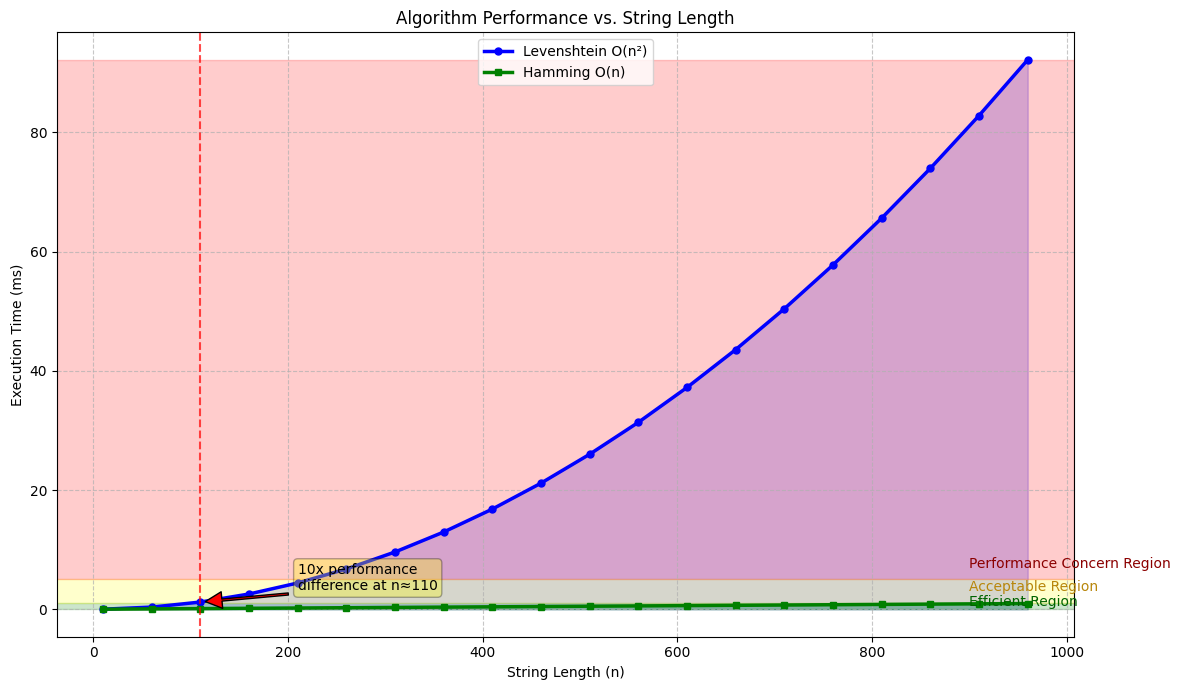

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated data based on algorithmic complexity
string_lengths = np.arange(10, 1010, 50)
levenshtein_times = [(n**2)/10000 for n in string_lengths]  # O(n²) simulation
hamming_times = [n/1000 for n in string_lengths]  # O(n) simulation

# Create figure
fig, ax = plt.subplots(figsize=(12, 7))

# Plot execution times
ax.plot(string_lengths, levenshtein_times, 'b-', linewidth=2.5,
        label='Levenshtein O(n²)', marker='o', markersize=5)
ax.plot(string_lengths, hamming_times, 'g-', linewidth=2.5,
        label='Hamming O(n)', marker='s', markersize=5)

# Fill areas between curves and x-axis
ax.fill_between(string_lengths, levenshtein_times, alpha=0.2, color='blue')
ax.fill_between(string_lengths, hamming_times, alpha=0.2, color='green')

# Add crossover point indicator
crossover_idx = 0
for i in range(len(string_lengths)):
    if levenshtein_times[i] >= hamming_times[i] * 10:  # 10x performance difference
        crossover_idx = i
        break

crossover_point = string_lengths[crossover_idx]
ax.axvline(x=crossover_point, color='red', linestyle='--', alpha=0.7)
plt.annotate(f'10x performance\ndifference at n≈{crossover_point}',
             xy=(crossover_point, levenshtein_times[crossover_idx]),
             xytext=(crossover_point+100, levenshtein_times[crossover_idx]+2),
             arrowprops=dict(facecolor='red', shrink=0.05, width=1.5),
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

# Add labels and title
ax.set_xlabel('String Length (n)')
ax.set_ylabel('Execution Time (ms)')
ax.set_title('Algorithm Performance vs. String Length')
ax.legend()

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Add efficiency regions
plt.axhspan(0, 1, alpha=0.2, color='green', label='Efficient')
plt.axhspan(1, 5, alpha=0.2, color='yellow')
plt.axhspan(5, max(levenshtein_times), alpha=0.2, color='red')

# Add region labels
ax.text(900, 0.5, 'Efficient Region', fontsize=10, color='darkgreen')
ax.text(900, 3, 'Acceptable Region', fontsize=10, color='darkgoldenrod')
ax.text(900, 7, 'Performance Concern Region', fontsize=10, color='darkred')

plt.tight_layout()
plt.show()